# **1. Imports and Setup:**

In [1]:
import pandas as pd
import numpy as np
import warnings
import datetime as dt

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("sample-orders.csv",encoding ='cp1252')
df

,order_date,order_id,customer,grand_total
0,9/7/11,CA-2011-100006,Dennis Kane,378
1,7/8/11,CA-2011-100090,Ed Braxton,699
2,3/14/11,CA-2011-100293,Neil Franzšsisch,91
3,1/29/11,CA-2011-100328,Jasper Cacioppo,4
4,4/8/11,CA-2011-100363,Jim Mitchum,21
...,...,...,...,...
5004,11/4/14,US-2014-168802,Jack O'Briant,18
5005,7/24/14,US-2014-169320,Lena Hernandez,171
5006,9/8/14,US-2014-169488,Allen Armold,57
5007,8/29/14,US-2014-169502,Matthew Grinstein,113


# **2. Data Overview:**

In [3]:
def data_overview(df, head=5):
    print(" HEAD ".center(50,'-'))
    print(df.head(head))
    print(" SHAPE OF DATASET ".center(50,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print("DATA INFO".center(50,'-'))
    print(df.info())
    print("DATA TYPES".center(50,'-'))
    print(df.dtypes.value_counts())
    print(" MISSING VALUES ".center(50,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(50,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(50,'-'))
    print(df.describe(include="all"))

# **3. Data Exploration and Preprocessing:**

In [4]:
data_overview(df)

---------------------- HEAD ----------------------
  order_date        order_id          customer  grand_total
0     9/7/11  CA-2011-100006       Dennis Kane          378
1     7/8/11  CA-2011-100090        Ed Braxton          699
2    3/14/11  CA-2011-100293  Neil Franzšsisch           91
3    1/29/11  CA-2011-100328   Jasper Cacioppo            4
4     4/8/11  CA-2011-100363       Jim Mitchum           21
---------------- SHAPE OF DATASET ----------------
Rows:5009
Columns:4
--------------------DATA INFO---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB
None
--------------------DATA TYPES--------------------
object 

**Data Overview:**

---


The dataset has 5009 rows and 4 columns.
The columns are named **order_date, order_id, customer, **and **grand_total.**

**Data Types:**

The order_date and order_id columns are of type object (typically strings).
The grand_total column is of type int64 (integer).
There are no missing values in any of the columns.

**Statistics:**

The order_date column seems to contain date values, but it's currently treated as an object. If needed, you may want to convert it to a datetime data type for further analysis.
The order_id column has 5009 unique values, meaning each order has a unique identifier.
The customer column has 793 unique values, and the most frequent customer is "Emily Phan."
The grand_total column has a mean of 458.63, with a minimum value of 1 and a maximum of 512.
The order_date column has 1238 unique values, and the most frequent date is "9/6/13."

**Additional Information:**

There are no duplicated values in the dataset.
The order_date column could be converted to a datetime format for more convenient date-based analysis.



In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [6]:
df

,order_date,order_id,customer,grand_total
0,2011-09-07,CA-2011-100006,Dennis Kane,378
1,2011-07-08,CA-2011-100090,Ed Braxton,699
2,2011-03-14,CA-2011-100293,Neil Franzšsisch,91
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4
4,2011-04-08,CA-2011-100363,Jim Mitchum,21
...,...,...,...,...
5004,2014-11-04,US-2014-168802,Jack O'Briant,18
5005,2014-07-24,US-2014-169320,Lena Hernandez,171
5006,2014-09-08,US-2014-169488,Allen Armold,57
5007,2014-08-29,US-2014-169502,Matthew Grinstein,113


# **4. RFM Calculation:**

In [7]:
NOW = dt.datetime(2014,12,31)
rfm_data=df.groupby('customer').agg({'order_date': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum()}) # Monetary Value

In [8]:
rfm_data['order_date'] = rfm_data['order_date'].astype(int)
rfm_data.rename(columns={'order_date': 'recency',
                         'order_id': 'frequency',
                         'grand_total': 'monetary_value'}, inplace=True)

In [9]:
rfm_data

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249
...,...,...,...
Xylona Preis,43,11,2375
Yana Sorensen,9,8,6721
Yoseph Carroll,4,5,5455


# **5. Standardization:**

In [10]:
#scaling data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)
rfm_scaled = pd.DataFrame(rfm_scaled)
#Renaming the columns
rfm_scaled.columns = ["recency","frequency","monatery"]
rfm_scaled.head()

,recency,frequency,monatery
0,1.441024,-1.300965,-0.765102
1,-0.724320,0.268108,-0.438874
2,-0.315967,0.268108,0.058270
3,-0.498651,0.660376,1.849665
4,-0.606112,1.444913,0.134022


# **6. Elbow Method and K-Means Clustering:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

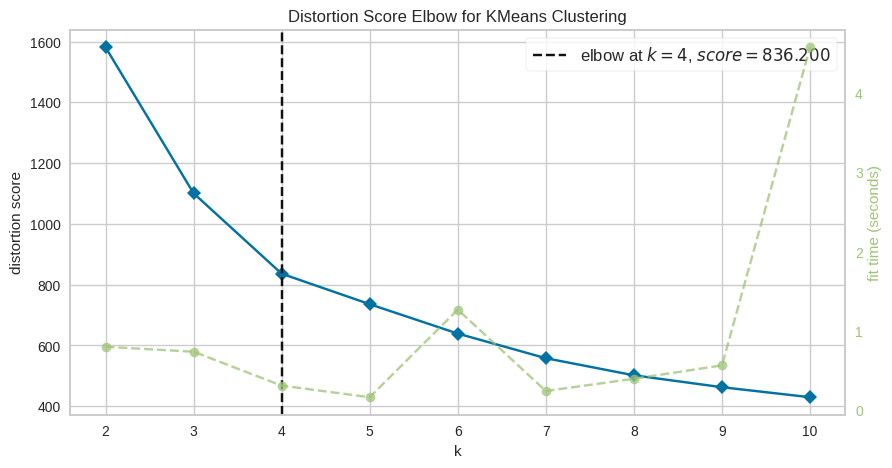

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#Random initailazing of k=10 to plot graph and find Elbow
plt.figure(figsize=(10,5))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(rfm_scaled)
Elbow_M.show()

In [12]:
#KMeans Clustering
kmeans = KMeans(init='k-means++', n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4, random_state=42)

# **7. Cluster Analysis and Visualization:**

In [13]:
#centriods
kmeans.cluster_centers_

array([[-0.40770855,  0.86181105,  0.12802254],
       [ 2.21217001, -1.02719486, -0.54306879],
       [-0.24465641, -0.63256872, -0.46506309],
       [-0.15293313,  0.75564114,  2.40251165]])

In [14]:
rfm_scaled["clusters"]=kmeans.labels_
rfm_scaled.head()

,recency,frequency,monatery,clusters
0,1.441024,-1.300965,-0.765102,1
1,-0.724320,0.268108,-0.438874,0
2,-0.315967,0.268108,0.058270,0
3,-0.498651,0.660376,1.849665,3
4,-0.606112,1.444913,0.134022,0


In [15]:
rfm_data["clusters"]=kmeans.labels_

<function matplotlib.pyplot.show(close=None, block=None)>

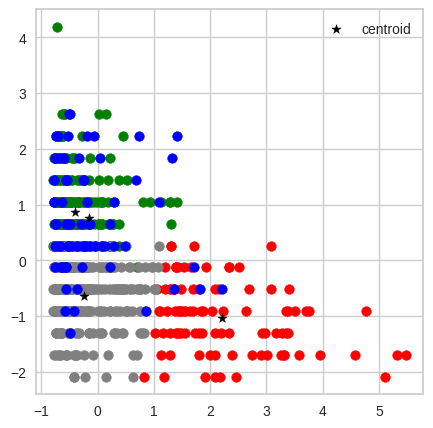

In [16]:
#grouping the data in accorandance with each cluster seperately
one = rfm_scaled[rfm_scaled["clusters"]==0]
two = rfm_scaled[rfm_scaled["clusters"]==1]
three = rfm_scaled[rfm_scaled["clusters"]==2]
four = rfm_scaled[rfm_scaled["clusters"]==3]

#Lets check the quality of clustering in the data set
plt.figure(figsize=(5,5))
plt.scatter(one["recency"],one["frequency"],color='green')
plt.scatter(two["recency"],two["frequency"],color='red')
plt.scatter(three["recency"],three["frequency"],color='grey')
plt.scatter(four["recency"],four["frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.legend()
plt.show

In [17]:
# visualize clusters
import plotly.express as px
figure = px.scatter_3d(rfm_scaled,
                    color='clusters',
                    x="recency",
                    y="frequency",
                    z="monatery",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

Text(0.5, 1.0, 'Recency v/s Clusters')

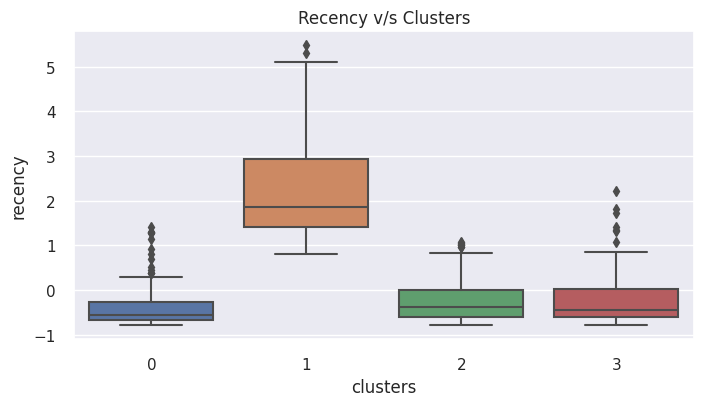

In [18]:
# Lets see the recency of each clusters
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="clusters",y="recency",data=rfm_scaled).set_title("Recency v/s Clusters")


*   The less the recent value the recent customer purchased products. Here the cluster 2 has fewer values.

Text(0.5, 1.0, 'Frequency v/s Clusters')

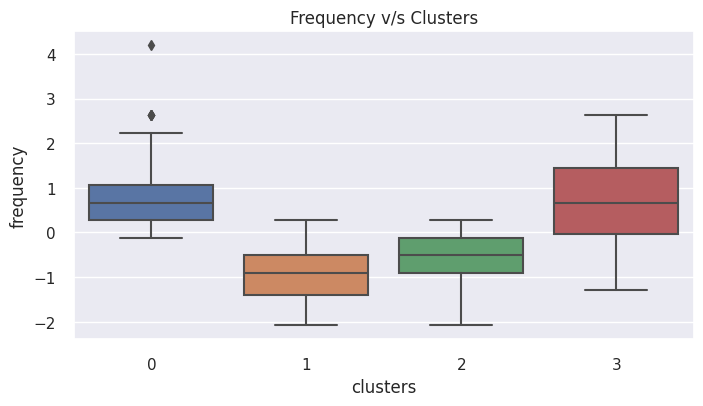

In [19]:
# Lets see the frequency of each clusters
sns.boxplot(x="clusters",y="frequency",data=rfm_scaled).set_title("Frequency v/s Clusters")



*   Cluster 0 has more frequent customers.




Text(0.5, 1.0, 'Monatery v/s Clusters')

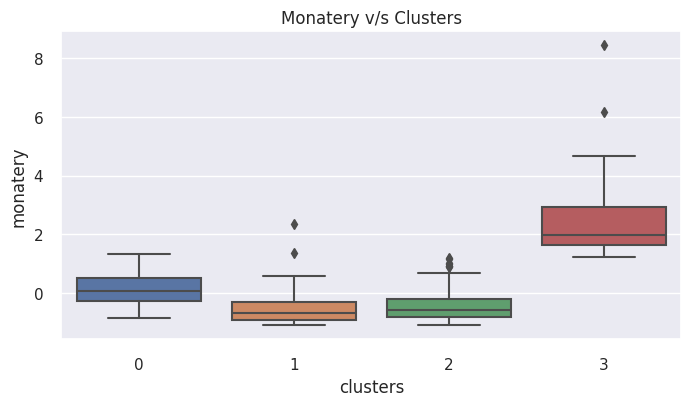

In [20]:
# Lets see the monatery of each clusters
sns.boxplot(x="clusters",y="monatery",data=rfm_scaled).set_title("Monatery v/s Clusters")


*   Cluster 0 seems to spend more.
*   Cluster 3 has a less monetary rate, so that makes it shows that Cluster 3 is where our Bronze Customers are.
*   Cluster 1 & 2 has a medium level monetary rate, which makes it the Cluster for our Silver Customers.
*   Cluster 0 has the highest monetary rate, making it the Cluster for our Gold Customers.

In [21]:
import plotly.express as px
fig = px.scatter(rfm_scaled,
                 x="recency",
                 y="monatery",
                 color='clusters',
                 category_orders={"clusters": ["0", "1", "2", "3"]}
                 )

# Add a marker for the specific recency and monetary values
fig.add_trace(px.scatter(x=[-0.17], y=[-1.075], color=['red'], size=[10]).data[0])

fig.show()


**Plotting Recency and monetary:**

From the graph we can say that the dark purple group the ones who like to spend more and they are the recent customers.

In [22]:
fig = px.scatter(rfm_scaled,
                 x="frequency",
                 y="monatery",
                 color='clusters',
                 category_orders={"clusters": ["0", "1", "2", "3"]}
                 )

# Add a marker for the specific recency and monetary values
fig.add_trace(px.scatter(x=[-0.17], y=[-1.075], color=['red'], size=[10]).data[0])

fig.show()


**Plotting Frequency and Monetary:**

Even here the dark purple and orange group of customers tried to purchase more and frequently whereas the purple and yellow group is very little frequency and spends very little.

In [23]:
fig = px.scatter(rfm_scaled,
                 x="recency",
                 y="frequency",
                 color='clusters',
                 category_orders={"clusters": ["0", "1", "2", "3"]}
                 )

# Add a marker for the specific recency and monetary values
fig.add_trace(px.scatter(x=[-0.17], y=[-1.075], color=['red'], size=[10]).data[0])

fig.show()


**Plotting Frequency and Recency:**

Even here, the orange and dark purple group frequently purchases products and they are the most recency one. The yellow ones tried to purchase recently but they are not frequent buyers which we can determine that they are the new customers.



# **8. RFM Score and Customer Segmentation:**

In [24]:
import numpy as np

# Creating bins and assigning scores for Recency (R)
bins_r = np.linspace(rfm_data["recency"].min(), rfm_data["recency"].max(), 6)
rfm_data["r_score"] = pd.cut(rfm_data["recency"], bins_r, labels=[5, 4, 3, 2, 1], include_lowest=True)

# Creating bins and assigning scores for Frequency (F)
bins_f = np.linspace(rfm_data["frequency"].min(), rfm_data["frequency"].max(), 6)
rfm_data["f_score"] = pd.cut(rfm_data["frequency"], bins_f, labels=[1, 2, 3, 4, 5], include_lowest=True)

# Creating bins and assigning scores for Monetary (M)
bins_m = np.linspace(rfm_data["monetary_value"].min(), rfm_data["monetary_value"].max(), 6)
rfm_data["m_score"] = pd.cut(rfm_data["monetary_value"], bins_m, labels=[1, 2, 3, 4, 5], include_lowest=True)

# Creating the "RFM SCORE" column
rfm_data["RFM SCORE"] = rfm_data["r_score"].astype(str) + rfm_data["f_score"].astype(str)

# Displaying the updated DataFrame
rfm_data.head()


,recency,frequency,monetary_value,clusters,r_score,f_score,m_score,RFM SCORE
customer,,,,,,,,
Aaron Bergman,415,3,887,1,4,1,1,41
Aaron Hawkins,12,7,1744,0,5,2,1,52
Aaron Smayling,88,7,3050,0,5,2,1,52
Adam Bellavance,54,8,7756,3,5,3,2,53
Adam Hart,34,10,3249,0,5,3,1,53


In [25]:
# Creating dictionary to name each segment
dict_seg = {
    r'^[12][12]$': 'hibernating',
    r'^[12][34]$': 'at_Risk',
    r'^[12]5$': 'cant_loose',
    r'^3[12]$': 'about_to_sleep',
    r'^33$': 'need_attention',
    r'^[45][45]$': 'loyal_customers',
    r'^41$': 'promising',
    r'^51$': 'new_customers',
    r'^[45][12]$': 'potential_loyalists',
    r'^[45]5$': 'champions'
}

# Creating the 'segment' column
rfm_data['segment'] = rfm_data['RFM SCORE'].replace(dict_seg, regex=True)

# Displaying the updated DataFrame
rfm_data.head()


,recency,frequency,monetary_value,clusters,r_score,f_score,m_score,RFM SCORE,segment
customer,,,,,,,,,
Aaron Bergman,415,3,887,1,4,1,1,41,promising
Aaron Hawkins,12,7,1744,0,5,2,1,52,potential_loyalists
Aaron Smayling,88,7,3050,0,5,2,1,52,potential_loyalists
Adam Bellavance,54,8,7756,3,5,3,2,53,53
Adam Hart,34,10,3249,0,5,3,1,53,53


In [26]:
# Creating a function to map RFM score to segments
def map_segments(rfm_score):
    if rfm_score in ['11', '12']:
        return 'hibernating'
    elif rfm_score in ['13', '14', '21', '22']:
        return 'at_Risk'
    elif rfm_score in ['15', '25']:
        return 'cant_loose'
    elif rfm_score in ['31', '32']:
        return 'about_to_sleep'
    elif rfm_score == '33':
        return 'need_attention'
    elif rfm_score in ['44', '45']:
        return 'loyal_customers'
    elif rfm_score == '41':
        return 'promising'
    elif rfm_score == '51':
        return 'new_customers'
    elif rfm_score in ['42', '52']:
        return 'potential_loyalists'
    elif rfm_score in ['54', '55']:
        return 'champions'
    else:
        return 'undefined'

# Applying the function to create the 'segment' column
rfm_data['segment'] = rfm_data['RFM SCORE'].apply(map_segments)

# Displaying the updated DataFrame
rfm_data.head()


,recency,frequency,monetary_value,clusters,r_score,f_score,m_score,RFM SCORE,segment
customer,,,,,,,,,
Aaron Bergman,415,3,887,1,4,1,1,41,promising
Aaron Hawkins,12,7,1744,0,5,2,1,52,potential_loyalists
Aaron Smayling,88,7,3050,0,5,2,1,52,potential_loyalists
Adam Bellavance,54,8,7756,3,5,3,2,53,undefined
Adam Hart,34,10,3249,0,5,3,1,53,undefined


# **9. Cluster Analysis and Segmentation Visualization**

In [27]:
#lets segregate dataframe w.r.t its cluster
c1 = rfm_data[rfm_data["clusters"]==0]
c2 =rfm_data[rfm_data["clusters"]==1]
c3 = rfm_data[rfm_data["clusters"]==2]
c4 = rfm_data[rfm_data["clusters"]==3]

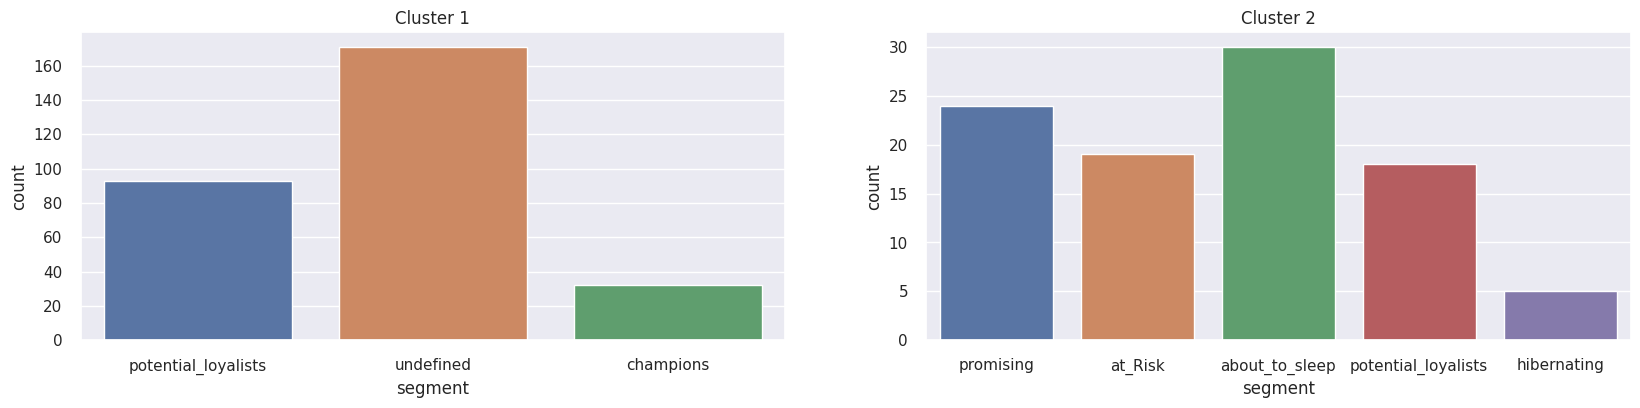

In [28]:
#Lets check who all are there in each clusters
sns.set(rc={"figure.figsize":(20, 4)})
fig, ax =plt.subplots(1,2)
sns.countplot(x="segment",data=c1,ax=ax[0]).set_title("Cluster 1")
sns.countplot(x="segment",data=c2,ax=ax[1]).set_title("Cluster 2")
fig.show()

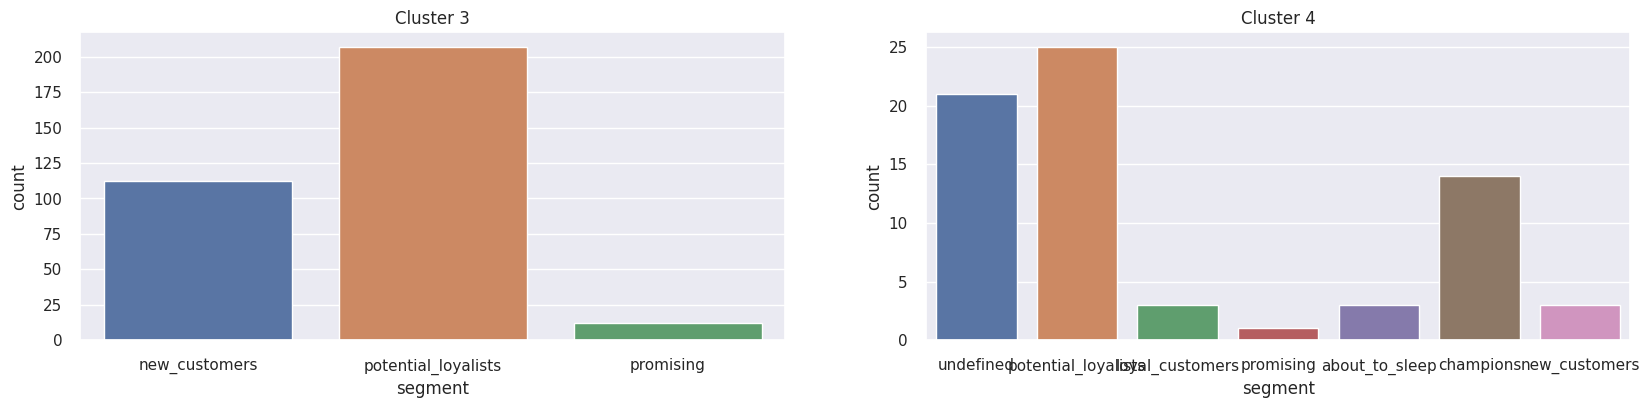

In [29]:
sns.set(rc={"figure.figsize":(20, 4)})
fig, ax =plt.subplots(1,2)
sns.countplot(x="segment",data=c3,ax=ax[0]).set_title("Cluster 3")
sns.countplot(x="segment",data=c4,ax=ax[1]).set_title("Cluster 4")
fig.show()

# **10. Conclusion:**

**General Observations:**


---


Cluster 4 has a substantial number of new and potential loyal customers, representing growth opportunities.

Clusters 1 and 3 contain a significant number of loyal and valuable customers, indicating areas of strength.

---
**Potential Areas for Improvement:**

Focus on engaging customers in ***Cluster 2 who are "About to Sleep"*** to prevent further disengagement.

Understand and address the undefined segments to better tailor marketing strategies.



**Recommendations:**


---

**Tailored Strategies:**
Tailor marketing strategies based on the specific characteristics of each cluster.

**Retention Efforts:**
Implement retention efforts for customers in Cluster 2 who are at risk or about to sleep.

**New Customer Focus:**
Focus on nurturing and retaining new customers in Cluster 4.

**Loyalty Programs:**
Strengthen loyalty programs for customers in Clusters 1 and 3.



**Overall Project Implications:**


---


The project successfully identified distinct customer clusters based on RFM analysis.

Understanding customer segments allows for targeted and effective marketing strategies.

Continuous monitoring and adjustment of strategies are crucial for adapting to changing customer behaviors.